RandomForestRegressor: errors
mean_absolute_error= 18721.599452054797
mean_squared_error= 1016963782.6700274
sqrt_mean_squared_error= 31889.869593180018
target.max= 755000
target.min= 34900
target.mean= 180921.19589041095
Features:
OverallQual 0.5583117663365591
GrLivArea 0.10591341321986725
1stFlrSF 0.04982844157643125
2ndFlrSF 0.02476416307945999
BsmtQual_Ex 0.024704137854978055
TotalBsmtSF 0.024385476976571206
LotArea 0.021109303207211123
FullBath 0.02081412367334622
BsmtFinSF1 0.01801783042318626
MasVnrArea 0.0139331155447022
GarageArea 0.011172188166373932
GarageCars 0.009911655143422762
YearBuilt 0.00905310920051482
LotFrontage 0.008751839235019035
Fireplaces 0.007262065454131192
YearRemodAdd 0.006834206021035696
GarageYrBlt 0.005909963709842788
WoodDeckSF 0.005666405042395448
ScreenPorch 0.004338640874837573
BsmtUnfSF 0.003910016203751772
Id 0.0034554981072187846
OpenPorchSF 0.0034277586628433062
GarageType_Detchd 0.0032061635600414548
BedroomAbvGr 0.0028553033481305
OverallCond

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


using Regressions, get errors
LogisticRegression absolute error: 38597.90753424657
LinearRegression absolute error: 19817.799891873587
DecisionTreeRegressor absolute error: 25556.12328767123


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


         log_r          lin_r      tr_r
0     143000.0  164404.188913  168000.0
1     190000.0  250281.927829  268000.0
2     135000.0   87556.082540   91500.0
3     200000.0  198170.125208  164000.0
4     250000.0  347865.527565  350000.0
5     140000.0  158099.653690  167500.0
6     135000.0  157251.352707  181000.0
7     239000.0  173794.152573  180500.0
8     135000.0  141776.869139  165500.0
9     135000.0  103558.839244  109900.0
10    135000.0  101121.913811   88000.0
11    141000.0  136802.712616  149000.0
12    130000.0  192888.940356  227000.0
13    178000.0  214477.544706  215000.0
14    200000.0  194644.077934  180000.0
15     88000.0  111245.831406   91500.0
16    145000.0  175186.703129  175000.0
17    135000.0  120626.846367  135000.0
18    250000.0  252089.202251  340000.0
19    145000.0  132895.662041  124000.0
20    250000.0  211958.451848  176000.0
21    110000.0  176169.675889   84500.0
22    115000.0   81022.407521   67000.0
23    135000.0  129735.640545  127000.0


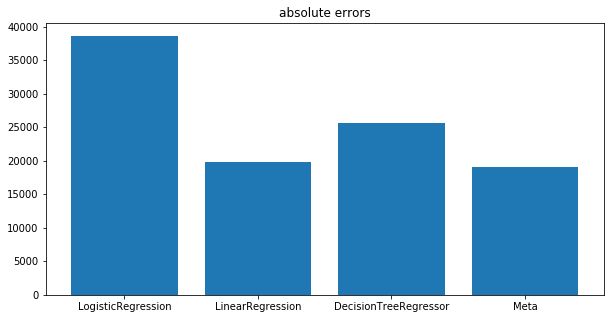

In [23]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import auc, roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error
%matplotlib inline

pd.set_option('display.expand_frame_repr', False)

#RandomForestRegressor
data = pd.read_csv('train.csv')

target = data['SalePrice']
del data['SalePrice']
    
data = pd.get_dummies(data=data)
data = data.replace([np.inf, -np.inf], np.nan)
data=data.fillna(data.median(), inplace=False)
data = data.dropna(axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target)

model = RandomForestRegressor()
model.fit(X_train,y_train)
prediction = model.predict(X_test)

print('RandomForestRegressor: errors')
print('mean_absolute_error=', mean_absolute_error(y_test, prediction))
print('mean_squared_error=', mean_squared_error(y_test, prediction))
print('sqrt_mean_squared_error=', mean_squared_error(y_test, prediction)**0.5)
print('target.max=', target.max())
print('target.min=', target.min())
print('target.mean=', target.mean())

feature_importances = list(zip(model.feature_importances_, data.columns))
feature_importances = sorted(feature_importances, key=lambda x: -x[0])

features = [x[1] for x in feature_importances][0:16]
print('Features:')
for importance, feature in feature_importances:
    print(feature, importance)
    
data = pd.read_csv('train.csv')
target = data['SalePrice']
del data['SalePrice']
#print(features)
data = pd.DataFrame(data.loc[:, features])

data = pd.get_dummies(data=data)
data = data.fillna(data.median())
data = data.dropna(axis=1)

scaler = StandardScaler()
data = scaler.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

log_r = LogisticRegression(penalty='l1', C=0.6)
log_r.fit(X_train, y_train)
y_log_r = log_r.predict(X_test)

lin_r = LinearRegression()
lin_r.fit(X_train, y_train)
y_lin_r = lin_r.predict(X_test)

tr_r = DecisionTreeRegressor()
tr_r.fit(X_train, y_train)
y_tr_r = tr_r.predict(X_test)

print('using Regressions, get errors')
print('LogisticRegression absolute error:', mean_absolute_error(y_test, y_log_r))
print('LinearRegression absolute error:', mean_absolute_error(y_test, y_lin_r))
print('DecisionTreeRegressor absolute error:', mean_absolute_error(y_test, y_tr_r))

#Стэкинг мета-признаков
def get_meta_features(clf, X_train, y_train, X_test, stack_cv):
    meta_train = np.zeros_like(y_train, dtype=float)
    meta_test = np.zeros_like(y_test, dtype=float)
    
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)):  
        clf.fit(X_train.iloc[train_ind], y_train.iloc[train_ind])
        meta_train[test_ind] = clf.predict(X_train.iloc[test_ind])
        meta_test += clf.predict(X_test)
    return meta_train, meta_test / stack_cv.n_splits

meta_train = []
meta_test = []
col_names = []

stack_cv = StratifiedKFold(n_splits=10, random_state=555)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

log_r = LogisticRegression(penalty='l2', C=0.6)
meta_tr, meta_te = get_meta_features(log_r, X_train, y_train, X_test, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('log_r')

lin_r = LinearRegression()
meta_tr, meta_te = get_meta_features(lin_r, X_train, y_train, X_test, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('lin_r')

tr_r = DecisionTreeRegressor()
meta_tr, meta_te = get_meta_features(tr_r, X_train, y_train, X_test, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('tr_r')

X_meta_train = pd.DataFrame(np.stack(meta_train, axis=1), columns=col_names)
X_meta_test = pd.DataFrame(np.stack(meta_test, axis=1), columns=col_names)

#clf_meta = LogisticRegression(penalty='l2', C=1)
#clf_meta = DecisionTreeRegressor()
clf_meta = LinearRegression()

clf_meta.fit(X_meta_train, y_train)

y_pred_meta_test = clf_meta.predict(X_meta_test)

print(X_meta_train)

log_r_err = mean_absolute_error(y_test, y_log_r)
lin_r_err = mean_absolute_error(y_test, y_lin_r)
tr_r_err = mean_absolute_error(y_test, y_tr_r)
meta_err = mean_absolute_error(y_test, y_pred_meta_test)

print('LogisticRegression absolute error:', log_r_err)
print('LinearRegression absolute error:', lin_r_err)
print('DecisionTreeRegressor absolute error:', tr_r_err)
print('meta absolute error:', meta_err)

errors = {
    'LogisticRegression': log_r_err,
    'LinearRegression': lin_r_err,
    'DecisionTreeRegressor': tr_r_err,
    'Meta': meta_err
}

err_names = list(errors.keys())
err_values = list(errors.values())

plt.figure(figsize=(10, 5))
plt.bar(err_names, err_values)
plt.title('absolute errors')
plt.show()



